# Dataset

In [1]:
train_test_new <- read.csv("train-test-new.csv")

In [2]:
head(train_test_new)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,no
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,no


In [3]:
n <- length(train_test_new[,1])
y.class <- rep(0,n)

In [4]:
for (i in 1:n){
    if (train_test_new[i, 20] == "yes"){
        y.class[i] <- 1
    }
}

In [5]:
train_test_all <- cbind(train_test_new[,1:19], y.class)
head(train_test_all)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y.class
56,self-employed,married,university.degree,no,yes,no,cellular,nov,wed,1,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195.8,0
57,management,married,university.degree,no,no,no,cellular,jul,tue,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
36,admin.,married,university.degree,no,yes,no,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
45,management,married,high.school,unknown,no,no,cellular,aug,wed,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
39,admin.,single,university.degree,no,yes,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0
33,services,married,high.school,no,no,yes,telephone,may,fri,2,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


In [6]:
train <- train_test_all[1:8000,]
test <- train_test_all[8001:10000,]

# Logistic Regression

In [7]:
result.LR1 <- glm(y.class~., data=train, family=binomial)

In [8]:
summary(result.LR1)


Call:
glm(formula = y.class ~ ., family = binomial, data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0286  -0.3931  -0.3156  -0.2555   2.8448  

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error z value Pr(>|z|)    
(Intercept)                  -1.274e+02  7.792e+01  -1.635 0.102048    
age                          -5.921e-03  4.777e-03  -1.240 0.215158    
jobblue-collar                6.226e-02  1.594e-01   0.391 0.696043    
jobentrepreneur               2.104e-01  2.345e-01   0.897 0.369555    
jobhousemaid                  3.492e-01  2.692e-01   1.297 0.194473    
jobmanagement                 2.070e-01  1.715e-01   1.207 0.227460    
jobretired                    6.060e-01  2.116e-01   2.864 0.004184 ** 
jobself-employed             -3.045e-01  2.706e-01  -1.125 0.260413    
jobservices                   1.494e-02  1.719e-01   0.087 0.930706    
jobstudent                    1.882e-02  2.

In [10]:
# Use the model to predict y on the test set
result.LR2<-predict(result.LR1,newdata=test, type="response")

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

In [14]:
install.packages("ROCR")

also installing the dependencies 'bitops', 'gtools', 'caTools', 'gplots'




  There are binary versions available but the source versions are later:
       binary source needs_compilation
gtools  3.8.2  3.9.4              TRUE
gplots  3.1.1  3.1.3             FALSE

  Binaries will be installed
package 'bitops' successfully unpacked and MD5 sums checked
package 'gtools' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\vstef\AppData\Local\Temp\RtmpaUl30i\downloaded_packages


installing the source package 'gplots'



Warning message:
"package 'ROCR' was built under R version 3.6.3"

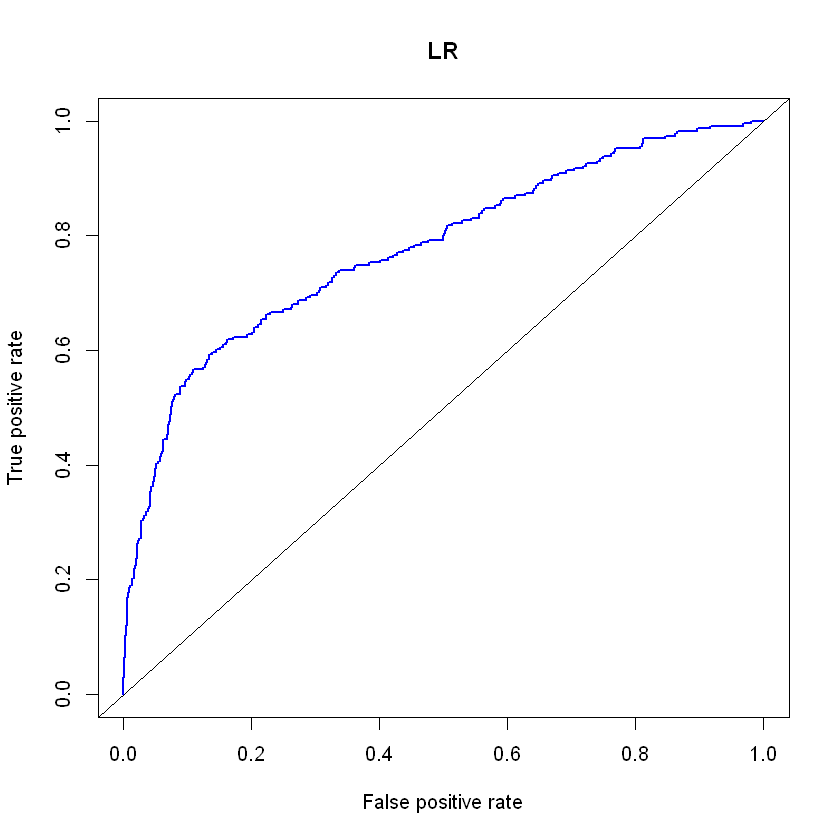

In [15]:
library("ROCR")
fit.LR.pred <-prediction( result.LR2, test[,20])
fit.LR.perf <- performance(fit.LR.pred,"tpr","fpr")
plot( fit.LR.perf,lwd=2,col="blue", main="LR")
abline(a=0,b=1)